# Advent of Haystack: Day 1
_Make a copy of this Colab to start!_

In this first challenge, we are going to build a pipeline that answers questions based on the contents of a URL. The given pipeline works as it, but your task is to complete the connnections and add the **other required two components**👇

**You should complete the missing sections in step 3, 4 and 5**

### Initial Components to use:
- [`LinkContentFetcher`](https://docs.haystack.deepset.ai/docs/linkcontentfetcher) for using the contents of several URLs in your pipeline
- [`HTMLToDocument`](https://docs.haystack.deepset.ai/docs/htmltodocument) for converting the HTML files into documents.
- [`PromptBuilder`](https://docs.haystack.deepset.ai/docs/promptbuilder) for creating the prompt
- [`OpenAIGenerator`](https://docs.haystack.deepset.ai/docs/openaigenerator) for generating responses

### 1) Installation

Install `haystack-ai`, `trafilatura` and `sentence-transformers` packages with `pip`:

In [1]:
!uv pip install haystack-ai trafilatura "sentence-transformers>=3.0.0"
#!uv pip install -q --upgrade openai # not to get the OpenAI proxies error: https://community.openai.com/t/error-with-openai-1-56-0-client-init-got-an-unexpected-keyword-argument-proxies/1040332/2

Audited 3 packages in 5ms


### (Optional) Change the Logging Level

This way, not only warnings but also information messages are displayed in the console output.

In [2]:
import logging

logging.basicConfig(format="%(levelname)s - %(name)s -  %(message)s", level=logging.WARNING)
logging.getLogger("haystack").setLevel(logging.DEBUG)

### 2) Enter API key for OpenAI
If you will use OpenAI models, save your API key as `OPENAI_API_KEY` environment variable.

In [3]:
print("I hope Local Llama works")
""" from getpass import getpass
import os

os.environ["OPENAI_API_KEY"] = getpass("Enter OpenAI API key:") """

I hope Local Llama works


' from getpass import getpass\nimport os\n\nos.environ["OPENAI_API_KEY"] = getpass("Enter OpenAI API key:") '

### 3) Create components

Initialize two components to complete the pipeline.

**Hints**:
* One component is to split the documents into smaller chunks of 10 sentences each.
* As the other component, consider methods or components you can use to filter out irrelevant chunks by ranking before injecting the context into the prompt

In [20]:
from haystack.components.fetchers import LinkContentFetcher
from haystack.components.converters import HTMLToDocument

from haystack.components.preprocessors import DocumentSplitter
from haystack.components.rankers import SentenceTransformersDiversityRanker

from haystack.components.builders import PromptBuilder
from haystack_integrations.components.generators.ollama import OllamaGenerator

fetcher = LinkContentFetcher()
converter = HTMLToDocument()
#### INITIALIZE THE MISSING COMPONENTS HERE ####

splitter = DocumentSplitter(split_by="sentence", split_length=10, split_overlap=0)
ranker = SentenceTransformersDiversityRanker()

# comp_one = ...
# comp_two = ...
################################################
template = """Given the information below, answer the query. Only use the provided context to generate the answer and output the used document links
            Context:
            {% for document in documents %}
                {{ document.content }}
                URL: {{ document.meta.url }}
            {% endfor %}

            Question: {{ query }}
            Answer:"""

prompt_builder = PromptBuilder(template = template)
generator = OllamaGenerator(model="llama3.2") # Feel free to try different models or different providers

### 4) Add them to a Haystack Pipeline

In [21]:
from haystack import Pipeline

pipeline = Pipeline()
pipeline.add_component(name="fetcher", instance=fetcher)
pipeline.add_component(name="converter", instance=converter)
#### ADD MISSING COMPONENTS HERE ####
pipeline.add_component(name="splitter", instance=splitter)
pipeline.add_component(name="ranker", instance=ranker)
#####################################
pipeline.add_component(name="prompt_builder", instance=prompt_builder)
pipeline.add_component(name="generator", instance=generator)

DEBUG - haystack.core.pipeline.base -  Adding component 'fetcher' (<haystack.components.fetchers.link_content.LinkContentFetcher object at 0x7f33fe5369f0>

Inputs:
  - urls: List[str]
Outputs:
  - streams: List[ByteStream])
DEBUG - haystack.core.pipeline.base -  Adding component 'converter' (<haystack.components.converters.html.HTMLToDocument object at 0x7f33fe536e70>

Inputs:
  - sources: List[Union[str, Path, ByteStream]]
  - meta: Union[Dict[str, Any], List[Dict[str, Any]]]
  - extraction_kwargs: Optional[Dict[str, Any]]
Outputs:
  - documents: List[Document])
DEBUG - haystack.core.pipeline.base -  Adding component 'splitter' (<haystack.components.preprocessors.document_splitter.DocumentSplitter object at 0x7f33fe5357c0>

Inputs:
  - documents: List[Document]
Outputs:
  - documents: List[Document])
DEBUG - haystack.core.pipeline.base -  Adding component 'ranker' (<haystack.components.rankers.sentence_transformers_diversity.SentenceTransformersDiversityRanker object at 0x7f33fe535850

### 5) Connect the components

Complete the pipeline connections to achieve a working pipeline that can be run.

**Note:** Everytime you want to run cell 4 and cell 5, you need to run cell 3 and reinitialize all components

In [22]:
#### CONNECT ALL COMPONENTS HERE ####
pipeline.connect("fetcher.streams", "converter.sources")
pipeline.connect("converter.documents", "splitter.documents")
pipeline.connect("splitter.documents", "ranker.documents")
pipeline.connect("ranker.documents", "prompt_builder.documents")
pipeline.connect("prompt_builder.prompt", "generator.prompt")
#####################################

DEBUG - haystack.core.pipeline.base -  Connecting 'fetcher.streams' to 'converter.sources'
DEBUG - haystack.core.pipeline.base -  Connecting 'converter.documents' to 'splitter.documents'
DEBUG - haystack.core.pipeline.base -  Connecting 'splitter.documents' to 'ranker.documents'
DEBUG - haystack.core.pipeline.base -  Connecting 'ranker.documents' to 'prompt_builder.documents'
DEBUG - haystack.core.pipeline.base -  Connecting 'prompt_builder.prompt' to 'generator.prompt'


🚅 Components
  - fetcher: LinkContentFetcher
  - converter: HTMLToDocument
  - splitter: DocumentSplitter
  - ranker: SentenceTransformersDiversityRanker
  - prompt_builder: PromptBuilder
  - generator: OllamaGenerator
🛤️ Connections
  - fetcher.streams -> converter.sources (List[ByteStream])
  - converter.documents -> splitter.documents (List[Document])
  - splitter.documents -> ranker.documents (List[Document])
  - ranker.documents -> prompt_builder.documents (List[Document])
  - prompt_builder.prompt -> generator.prompt (str)

### 6) Visualize the Pipeline 🎨

Display the pipeline image with [`show()`](https://docs.haystack.deepset.ai/docs/visualizing-pipelines) method to understand the connections between components

DEBUG - haystack.core.pipeline.draw -  Mermaid diagram:

%%{ init: {'theme': 'neutral' } }%%

graph TD;

fetcher["<b>fetcher</b><br><small><i>LinkContentFetcher</i></small>"]:::component -- "streams -> sources<br><small><i>List[ByteStream]</i></small>" --> converter["<b>converter</b><br><small><i>HTMLToDocument<br><br>Optional inputs:<ul style='text-align:left;'><li>meta (Union[Dict[str, Any], List[Dict[str, Any]]])</li><li>extraction_kwargs (Optional[Dict[str, Any]])</li></ul></i></small>"]:::component
converter["<b>converter</b><br><small><i>HTMLToDocument<br><br>Optional inputs:<ul style='text-align:left;'><li>meta (Union[Dict[str, Any], List[Dict[str, Any]]])</li><li>extraction_kwargs (Optional[Dict[str, Any]])</li></ul></i></small>"]:::component -- "documents -> documents<br><small><i>List[Document]</i></small>" --> splitter["<b>splitter</b><br><small><i>DocumentSplitter</i></small>"]:::component
splitter["<b>splitter</b><br><small><i>DocumentSplitter</i></small>"]:::component -- 

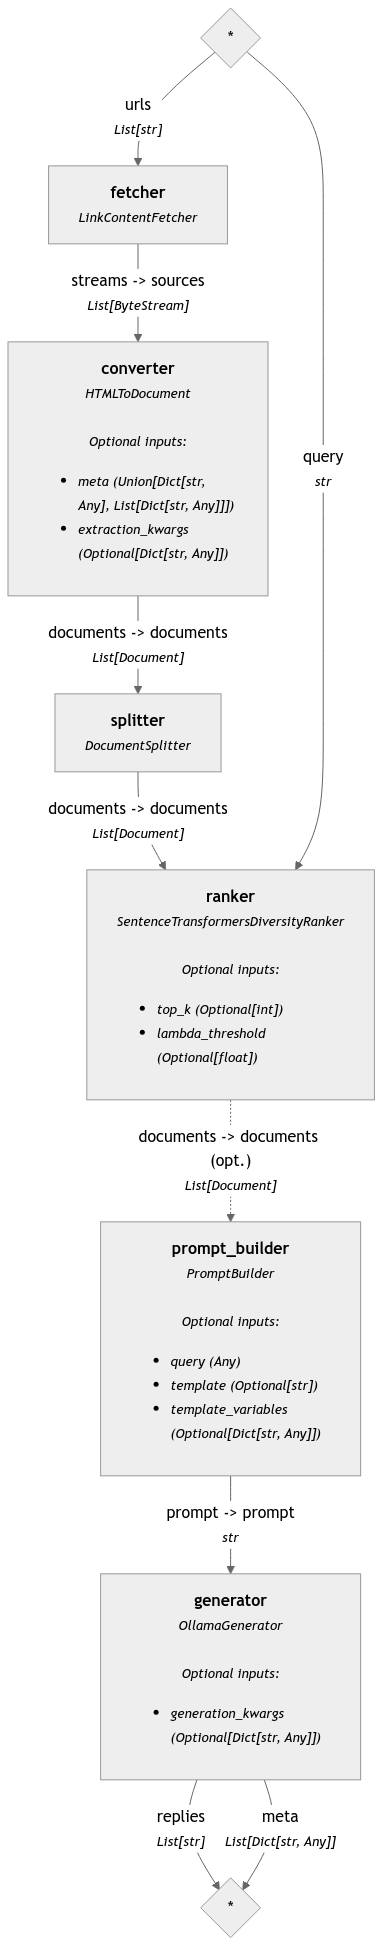

In [23]:
pipeline.show()

### 7) Run the Pipeline

Use the URLs below and try the example queries.

In [25]:
urls = ["https://haystack.deepset.ai/blog/extracting-metadata-filter",
        "https://haystack.deepset.ai/blog/query-expansion",
        "https://haystack.deepset.ai/blog/query-decomposition",
        "https://haystack.deepset.ai/cookbook/metadata_enrichment"]

## Example queries you can try
query = "What is the difference between metadata filtering and metadata enrichment?"
# query = "Which methods can I use to transform query for better retrieval?"
# query = "How can I use metadata to improve retrieval?"
# query = "What's preprocessing?" # Should return no answer

## Add parameters
result = pipeline.run(data={"fetcher": {"urls": urls}, "prompt_builder": {"query": query}, "ranker": {"query": query}})

INFO - haystack.core.pipeline.base -  Warming up component ranker...
INFO - haystack.core.pipeline.pipeline -  Running component fetcher
INFO - haystack.core.pipeline.pipeline -  Running component converter
INFO - haystack.core.pipeline.pipeline -  Running component splitter
INFO - haystack.core.pipeline.pipeline -  Running component ranker
INFO - haystack.core.pipeline.pipeline -  Running component prompt_builder
INFO - haystack.core.pipeline.pipeline -  Running component generator


Print the LLM response

In [26]:
print(result['generator']['replies'][0])

Metadata filtering and metadata enrichment are two related but distinct concepts in the context of information retrieval and text analysis.

**Metadata Filtering**: Metadata filtering refers to the process of selecting or excluding documents from a search result set based on specific criteria, such as keywords, phrases, or topics. This involves applying filters to a dataset to narrow down the scope of the search results. For example, you might filter out documents that contain irrelevant information or keywords that are not relevant to your query.

In metadata filtering, the focus is on reducing the noise in the data by removing unwanted or irrelevant documents. This can help improve the accuracy and relevance of the search results.

**Metadata Enrichment**: Metadata enrichment, on the other hand, involves adding additional metadata or features to a dataset to make it more informative and useful for analysis or retrieval tasks. This might involve extracting new features from existing d

### (Optional) Bonus Task

Try to recreate the same pipeline but this time, use [OpenAIChatGenerator](https://docs.haystack.deepset.ai/docs/openaichatgenerator) and [ChatPromptBuilder](https://docs.haystack.deepset.ai/docs/chatpromptbuilder)

In [ ]:
from haystack.components.generators.chat import OpenAIChatGenerator
from haystack.components.builders import ChatPromptBuilder
from haystack.dataclasses import ChatMessage

# Left For Later... I'll Try to Implement it in using Ollama instead of OpenAI